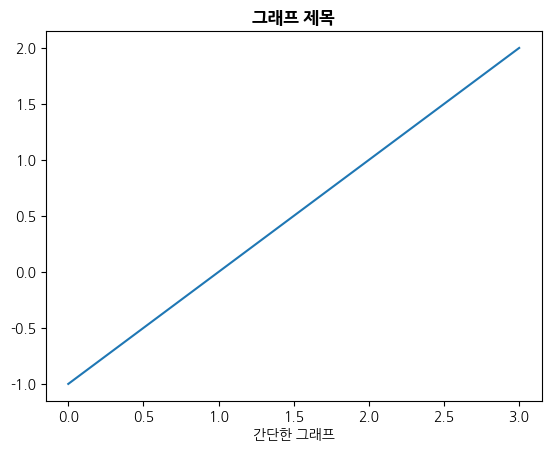

In [1]:
import	matplotlib.pyplot as	plt
import	koreanize_matplotlib
import pandas as pd
plt.plot([-1,	0,	1,	2])
plt.title('그래프 제목',	fontweight="bold")
plt.xlabel('간단한 그래프')
plt.show() # 한글이 나오는지 테스트

In [2]:
import	csv
f=open('../Data/Daegu_utf8.csv','r',encoding='utf-8')
data=csv.reader(f,	delimiter=',')
print(data)	#csv_reader 객체 출력
f.close()	#파일 닫기

In [3]:
import	csv
csvfile=open('../Data/Daegu_temperature.csv',"r",encoding='utf-8')
data=csv.reader(csvfile, delimiter=',') #	delimiter:	구분자(‘,’),	csv파일은 delimiter 생략 가능
count=0
for row in data: # 한 줄 한줄씩 실행
    if count>5:
        break
    else :
        print(row)
    count+=1
f.close()

['', '날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)', '']
['', '1907-01-31', '143', '', '-7', '0.8', '']
['', '1907-02-01', '143', '', '', '', '']
['', '1907-02-02', '143', '', '', '', '']
['', '1907-02-03', '143', '', '', '', '']
['', '1907-02-04', '143', '', '', '', '']


In [4]:
# file=pd.read_csv("../Data/Daegu_temperature.csv")
# result=pd.DataFrame(file)
# result
# result.drop(["Unnamed: 0","Unnamed: 6"],axis="columns").to_csv("../Data/Daegu_utf8.csv", index=False)

In [5]:
#encoding='utf-8-sig'로 '\ufeff'	제거
fin	=open('../Data/Daegu_utf8.csv','r',encoding='utf-8-sig') # 읽기용으로 파일 open
data=csv.reader(fin,delimiter=',')

#newline='':한 라인씩 건너 뛰며 저장되는 현상 없앰
fout =open('../Data/Daegu_utf8_revised.csv','w', newline='',	encoding='utf-8-sig')
wr =csv.writer(fout)
for	row	in	data: # 한 줄씩 읽어옴
    for	i in range(len(row)): # 한 줄마다 요소를 반복
            row[i]=row[i].replace('\t',	'')
    print(row)
    wr.writerow(row)	#writerow(row):	한 행씩 파일로 저장
    
fin.close()
fout.close()
print('파일 저장 완료')

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
['1907-01-31', '143', '', '-7.0', '0.8']
['1907-02-01', '143', '', '', '']
['1907-02-02', '143', '', '', '']
['1907-02-03', '143', '', '', '']
['1907-02-04', '143', '', '', '']
['1907-02-05', '143', '', '', '']
['1907-02-06', '143', '', '', '']
['1907-02-07', '143', '', '', '']
['1907-02-08', '143', '', '', '']
['1907-02-09', '143', '', '', '']
['1907-02-10', '143', '', '-3.0', '4.8']
['1907-02-11', '143', '', '', '']
['1907-02-12', '143', '', '', '']
['1907-02-13', '143', '', '', '']
['1907-02-14', '143', '', '', '']
['1907-02-15', '143', '', '', '']
['1907-02-16', '143', '', '', '']
['1907-02-17', '143', '', '', '']
['1907-02-18', '143', '', '', '']
['1907-02-19', '143', '', '', '']
['1907-02-20', '143', '', '-3.4', '7.6']
['1907-02-21', '143', '', '', '']
['1907-02-22', '143', '', '', '']
['1907-02-23', '143', '', '', '']
['1907-02-24', '143', '', '', '']
['1907-02-25', '143', '', '', '']
['1907-02-26', '143', '', '', '']
['1907-02-27', 

In [6]:
f=open("../Data/Daegu_utf8_revised.csv", encoding='utf-8-sig')
data=csv.reader(f,	delimiter=',')
header=next(data)
print(header)
f.close

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']


<function TextIOWrapper.close()>

In [7]:
f=open('../Data/Daegu_utf8_revised.csv',encoding='utf-8-sig')
data=csv.reader(f,	delimiter=',')
header=next(data) # header를 사용하여 데이터를 출력했다면
print(header) # data는 2번째 줄을 가르킨다
i =	1
for	row	in data: # 그 이후부터 5개의 행 출력
    print(row)
    if i>=5:
        break
    i+=1
    pass
f.close()

['날짜', '지점', '평균기온(℃)', '최저기온(℃)', '최고기온(℃)']
['1907-01-31', '143', '', '-7.0', '0.8']
['1907-02-01', '143', '', '', '']
['1907-02-02', '143', '', '', '']
['1907-02-03', '143', '', '', '']
['1907-02-04', '143', '', '', '']


대구 기온의 최저, 최고 기온의 날짜와 온도 구하기 (문제 분해 과정)  
• 1. csv	데이터를 읽음  
• 2. 순차적으로 최저, 최고 기온을 확인 (비교)  
• 3. 최저, 최고 기온의 날짜의 데이터를 저장   
– 문자열 형태의 데이터를 실수 형태로 변환  
– 지금까지의 최고 기온 값보다 현재 행(row)의 최고 기온이 더 높으면  
> 최고 기온 날짜 업데이트  
> 최고 기온 값 업데이트  
– 지금까지 최저 기온 값보다 현재 행(row)의 최저 기온이 더 낮으면  
> 최저 기온 날짜 업데이트  
> 최저 기온 값 업데이트  
• 4. 최종 저장된 데이터 출력  

In [27]:
def	get_minmax_temp(data):
    '''
    최고 기온 및 최고 기온의 날짜 구하기
    '''
    header=next(data)
    min_temp =	float('inf')	 #	최저 기온값을 저장할 변수 초기화(가장 큰 값)
    min_date =	""	 # 최고 기온의 날짜를 저장할 변수 초기화
    max_temp = float('-inf')	 #	최고 기온을 저장할 변수 초기화(가장 작은 값)
    max_date =	"" #	최고 기온의 날짜를 저장할 변수 초기화

    for	row	in	data:
        # 값이 비어있을 경우 그냥 넘어간다
        if	row[3]	==	'' : # row[3]이 최저기온, row[4]가 최고기온이다
            continue
        
        if	row[4]	==	'':	#	[-1]:	리스트에서 마지막 데이터가 없는 경우
            continue
        
        row[3]=float(row[3])
        row[4]=float(row[4])
        #	최저 기온 계산
        if	row[3]	<	min_temp:
            min_temp =	row[3]
            min_date =	row[0]
        #	최고기온 계산
        if	row[4]	>	max_temp:
            max_temp =	row[4]
            max_date =	row[0]	#	날짜:	index[0]		
    print('-'	*	50)
    print(f'대구 최저 기온 날짜:	{min_date},	온도:	{min_temp}')
    print(f'대구 최고 기온 날짜:	{max_date},	온도:	{max_temp}')

def	main():
    f=open('../Data/Daegu_utf8_revised.csv',encoding='utf-8-sig')
    data=csv.reader(f)
    get_minmax_temp(data)
    f.close()
main()

--------------------------------------------------
대구 최저 기온 날짜:	1923-01-19,	온도:	-20.2
대구 최고 기온 날짜:	1942-08-01,	온도:	40.0


42097


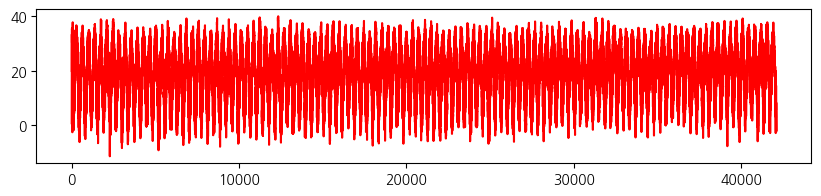

In [28]:
import	csv
import	matplotlib.pyplot as	plt
f	=	open('../Data/Daegu_utf8_revised.csv',	encoding='utf-8-sig')	#	utf-8-sig	생략 가능
data	=	csv.reader(f)
header	=	next(data)
result	=	[]
for	row	in	data:
    if	row[4]	!=	'':	#	최고 기온 데이터 값이 있으면,	리스트에 저장
        result.append(float(row[4]))
print(len(result))
f.close()
plt.figure(figsize=(10,	2))	#	그래프 크기 조절(가로 10인치,	세로 2인치)
plt.plot(result,	'r')	#	result	리스트에 저장된 값을 빨간색 그래프로 그리기
plt.show()	#	그래프 그리기

[1, 1, 3, 5, 2, 5, 6, 2, 4, 5]


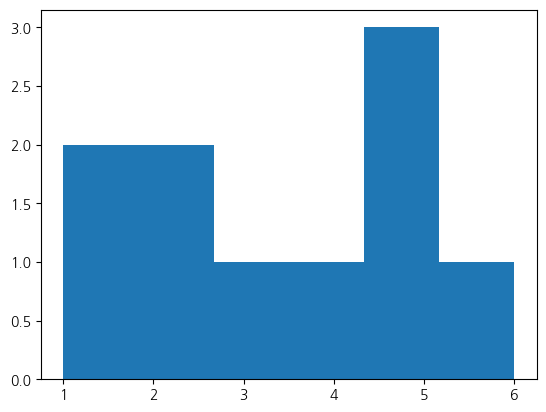

In [29]:
import	random
import	matplotlib.pyplot as	plt
dice	=	[]
for	i in range(10):
	dice.append(random.randint(1,	6))
print(dice)
plt.hist(dice,	bins=6)
plt.xticks([1,	2,	3,	4,	5,	6])
plt.show()

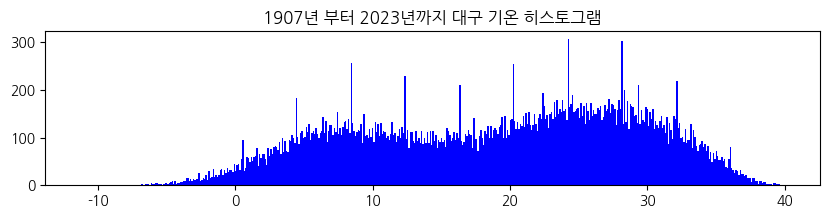

In [30]:
import	csv
import	matplotlib.pyplot as	plt
import koreanize_matplotlib # 한글 폰트를 지정할 필요가 없게 해준다
f	=	open('../Data/Daegu_utf8_revised.csv',	encoding='utf-8-sig')
data	=	csv.reader(f)
next(data)
result	=	[]
for	row	in	data	:
    if	row[-1]	!=	''	:	#	최고 기온을 리스트에 저장
        result.append(float(row[-1]))
f.close()
plt.figure(figsize=(10,	2))
plt.hist(result,	bins=500,	color='blue')	#	result에 저장된 값을 히스토그램으로 그림
plt.rc('font',	family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']	=	False	 #	레이블에 마이너스('-')기호 깨지는 현상 해결
plt.title("1907년 부터 2023년까지 대구 기온 히스토그램")
plt.show()

In [31]:
"""
				문자열 분리:	split('구분자')
"""
date_string1	=	'2024	01	01'
#	공백을 기준으로 분리
print(date_string1.split())
#	구분자:'-'	기준으로 분리
date_string2	=	'2023-12-31'
split_date_string =	date_string2.split('-')
print(split_date_string)
year	=	split_date_string[0]
month	=	split_date_string[1]
day	=	split_date_string[2]
print(f'연도:{year},	월:{month},	일:{day}')

['2024', '01', '01']
['2023', '12', '31']
연도:2023,	월:12,	일:31


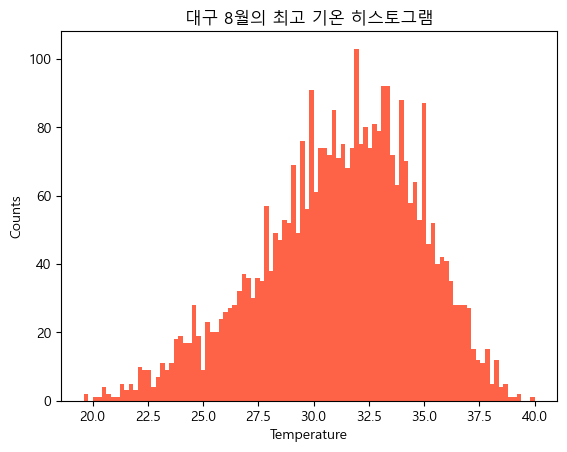

In [33]:
import	csv
import	matplotlib.pyplot as plt
import koreanize_matplotlib
f=open('daegu-utf8.csv', encoding='utf-8-sig')
data=csv.reader(f)
next(data)
aug =[]
for	row	in	data	:
	month=row[0].split('-')[1]
	if	row[-1]	!=	''	:
		if	month=='08':
			aug.append(float(row[-1]))
f.close()
plt.hist(aug,bins=100,color	='tomato')
plt.title('대구 8월의 최고 기온 히스토그램')
plt.xlabel("Temperature")	#	x축 레이블
plt.ylabel("Counts")		#	y축 레이블
plt.show()

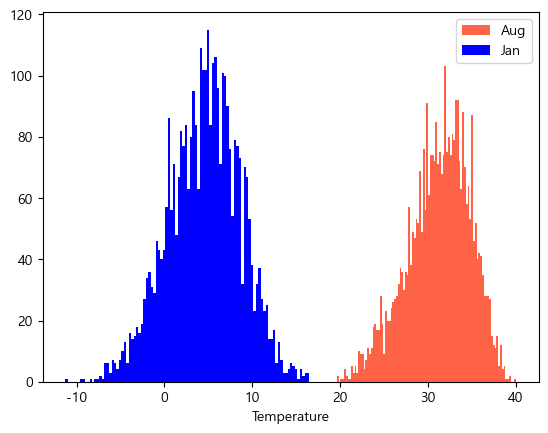

In [32]:
import	csv
import	matplotlib.pyplot as plt
f =open('../data/Daegu_utf8_revised.csv',encoding='utf-8-sig')
data = csv.reader(f)
next(data)
aug =[]
jan =[]
for	row	in	data:
    month=row[0].split('-')[1] # 날짜를 - 기호로 나눠서 인덱싱으로 월만 뽑아옴
    if	row[-1]	!=	''	:
        if	month=='08': # 8월달이면 데이터 추가
            aug.append(float(row[-1]))
        if	month=='01': # 1월달이면 데이터 추가
            jan.append(float(row[-1]))
f.close()
plt.hist(aug,bins=100,color='tomato',label='Aug')
plt.hist(jan,bins=100,color='b',label='Jan')
plt.xlabel("Temperature")
plt.rc('axes',	unicode_minus=False)	#	레이블에 '-'부호가 깨지는 현상 방지
plt.legend()
plt.show()

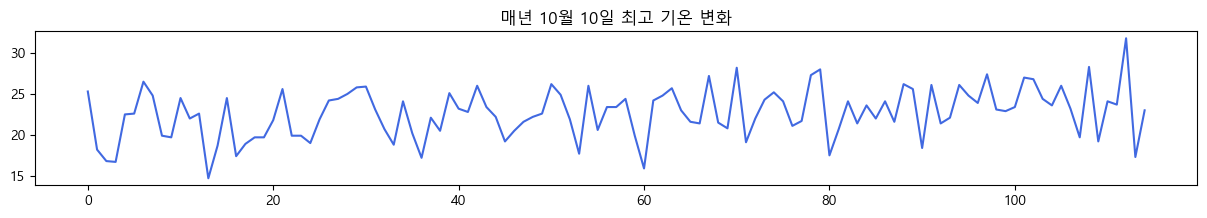

In [35]:
import	csv
import	matplotlib.pyplot as plt
import	koreanize_matplotlib
def	draw_graph_on_date(month,day):
    f=open('../Data/Daegu_utf8_revised.csv',encoding='utf-8-sig')
    data=csv.reader(f)
    next(data)
    result=[]
    for	row	in	data:
        if	row[-1]	!=	'':
            date_string =	row[0].split('-')
            if	date_string[1]	==	month and	date_string[2]	==	day: # 해당하는 월과 일의 데이터가 맞으면!
                result.append(float(row[-1])) # 최고 기온을 실수형으로 변환 후 리스트에 추가
    f.close()
    plt.figure(figsize=(15,2))
    plt.plot(result,'royalblue')
    plt.rc('axes',	unicode_minus=False)
    plt.rc('font',	family='Malgun Gothic')
    plt.title(f'매년 {month}월 {day}일 최고 기온 변화')
    plt.show()
month,	date=input('날짜(월 일)를 입력하세요:	').split()
draw_graph_on_date(month,	date)
# 10 10 <- 입력값

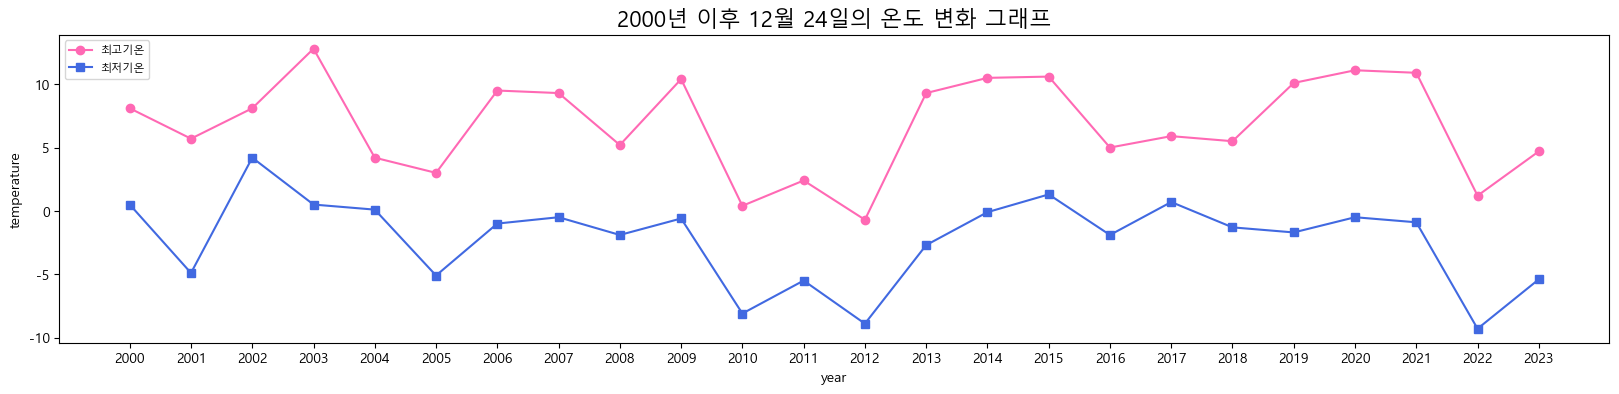

In [36]:
import	csv
import	matplotlib.pyplot as	plt
import	platform
import	koreanize_matplotlib
def	draw_lowhigh_graph(start_year,	month,	day):
    f=open('../data/Daegu_utf8_revised.csv',	encoding='utf-8-sig')
    data=csv.reader(f)
    next(data)
    high_temp =	[]		#	최고 기온을 저장할 리스트
    low_temp =	[]			#	최저 기온을 저장할 리스트
    x_year =	[]					#	x축 연도를 저장할 리스트
    for	row	in	data	:
        if	row[-1]	!=	''	:
            date_string =	row[0].split('-')	#	날짜 데이터를 미리 분리함
            if	int(date_string[0])	>=	start_year:	#	문자열 값을 int형으로 변환해서 비교 <- 숫자를 그대로 입력했기 때문
                if	int(date_string[1])	==	month	and	int(date_string[2])	==	day:
                    high_temp.append(float(row[-1]))
                    low_temp.append(float(row[-2]))
                    x_year.append(date_string[0])	#	연도 저장
    f.close()

    plt.figure(figsize=(20,	4))
    plt.plot(x_year,high_temp,	'hotpink',marker='o',	label='최고기온')	#	최고 기온 그래프
    plt.plot(x_year,low_temp,	'royalblue',marker='s',	label='최저기온')	#	최저 기온 그래프
    if	platform.system()	==	'Windows':
        plt.rc('font',	family='Malgun Gothic',	size=8)	#	간단히 맑은 고딕으로 설정
    else:
        plt.rc('font',	family='AppleGothic',	size=8)	#	한글 폰트 사용 For	Mac	OS
    plt.rcParams['axes.unicode_minus']	=	False	#	음수(-)가 깨지는 것 방지
    plt.title(f"{start_year}년 이후 {month}월 {day}일의 온도 변화 그래프",	size=16)
    plt.legend(loc=2)
    plt.xlabel('year')
    plt.ylabel('temperature')
    plt.show()
draw_lowhigh_graph(2000,12,	24)